## Imports

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import dataset

In [108]:
iris = pd.read_csv('Iris.csv')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [109]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [110]:
## Check whether the dataset is balanced

In [111]:
iris['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

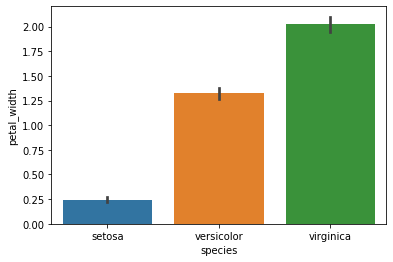

In [112]:
sns.barplot(data=iris,x='species', y='petal_width')

In [113]:
# Obtain Independent variable X and dependent variable y 

In [114]:
X = iris.iloc[:,:-1]
y = iris.iloc[:,-1]

In [115]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(y)
y

#0 --setosa
#1 --versicolor
#2 --virginica

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [117]:
y_test

array([0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1,
       1, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 1], dtype=int64)

In [118]:
#Perform Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test =sc.transform(X_test)


In [119]:
X_test[:5]

array([[-0.47931928,  2.56741633, -1.3398623 , -1.2954085 ],
       [-0.59783229,  1.86006694, -1.39462507, -1.04840264],
       [-1.07188433,  0.9169344 , -1.23033677, -0.80139678],
       [ 1.53540188, -0.26198126,  1.06969933,  0.43363251],
       [ 1.29837586,  0.20958501,  0.46730892,  0.18662665]])

## using Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
logmodel = LogisticRegression()

In [122]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [123]:
y_pred = logmodel.predict(X_test)
y_pred

array([0, 0, 0, 2, 2, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1, 0,
       1, 2, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2], dtype=int64)

In [124]:
y_test

array([0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1,
       1, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 1], dtype=int64)

In [125]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [126]:
print('Classification report is \n',classification_report(y_pred,y_test))

Classification report is 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       0.73      0.95      0.83        20
          2       0.93      0.67      0.78        21

avg / total       0.89      0.87      0.86        60



In [127]:
print('Confusion matrix \n', confusion_matrix(y_pred,y_test))

Confusion matrix 
 [[19  0  0]
 [ 0 19  1]
 [ 0  7 14]]


In [128]:
print('Accuracy score', accuracy_score(y_pred,y_test))

Accuracy score 0.8666666666666667


## Naive Bayes Classifier

In [129]:
from sklearn.naive_bayes import GaussianNB

In [130]:
classifier = GaussianNB()

In [131]:
classifier.fit(X_train,y_train)

GaussianNB(priors=None)

In [132]:
pred = classifier.predict(X_test)

In [133]:
print('Classifaction report', classification_report(pred,y_test))

Classifaction report              precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       0.96      0.96      0.96        26
          2       0.93      0.93      0.93        15

avg / total       0.97      0.97      0.97        60



In [134]:
print('Confusion Matrix \n',confusion_matrix(pred,y_test))

Confusion Matrix 
 [[19  0  0]
 [ 0 25  1]
 [ 0  1 14]]


In [135]:
print('Accuracy score \n', accuracy_score(pred,y_test))

Accuracy score 
 0.9666666666666667


## using SVM

In [136]:
from sklearn.svm import SVC

In [137]:
svc = SVC(kernel='rbf')

In [138]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [139]:
prediction = svc.predict(X_test)
prediction

array([0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2,
       1, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 1], dtype=int64)

In [140]:
print('Classifaction report \n', classification_report(prediction,y_test))

Classifaction report 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       0.96      1.00      0.98        25
          2       1.00      0.94      0.97        16

avg / total       0.98      0.98      0.98        60



In [141]:
print('Confusion Matrix \n',confusion_matrix(prediction,y_test))

Confusion Matrix 
 [[19  0  0]
 [ 0 25  0]
 [ 0  1 15]]


In [142]:
print('Accuracy score \n', accuracy_score(prediction,y_test))

Accuracy score 
 0.9833333333333333


## Using Decision Tree

In [143]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
dtree = DecisionTreeClassifier()

In [145]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [146]:
dtree_pred = dtree.predict(X_test)
dtree_pred

array([0, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2,
       1, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 1], dtype=int64)

In [147]:
print('Classifaction report \n', classification_report(dtree_pred,y_test))

Classifaction report 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       0.96      0.96      0.96        26
          2       0.93      0.93      0.93        15

avg / total       0.97      0.97      0.97        60



In [148]:
print('Confusion Matrix \n',confusion_matrix(dtree_pred,y_test))

Confusion Matrix 
 [[19  0  0]
 [ 0 25  1]
 [ 0  1 14]]


In [149]:
print('Accuracy score \n', accuracy_score(dtree_pred,y_test))

Accuracy score 
 0.9666666666666667
